In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.ensemble import AdaBoostRegressor, ExtraTreesRegressor, GradientBoostingRegressor, RandomForestRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, SGDRegressor
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, TimeSeriesSplit
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import LinearSVR
from sklearn.tree import DecisionTreeRegressor

from utils import prepare

%matplotlib inline
%config InlineBackend.figure_formats = ['retina']

In [2]:
X_train_scaled, y_train_scaled, X_test_scaled, y_test_scaled, X_scaler, y_scaler = prepare()

In [3]:
tscv = TimeSeriesSplit()

In [4]:
def reg_scores(y_test, y_pred):
  return {
      "MAE": mean_absolute_error(y_test, y_pred),
      "MAPE": mean_absolute_percentage_error(y_test, y_pred),
      "MSE": mean_squared_error(y_test, y_pred),
      "RMSE": np.sqrt(mean_squared_error(y_test, y_pred)),
      "R2": r2_score(y_test, y_pred)
  }

In [5]:
models = {
  "Linear Regression": LinearRegression(),
  "Lasso": Lasso(),
  "Ridge": Ridge(),
  "ElasticNet": ElasticNet(),
  "KNN": KNeighborsRegressor(),
  "SVR": LinearSVR(),
  "Decision Tree": DecisionTreeRegressor(),
  "Random Forest": RandomForestRegressor(),
  "Extra Trees": ExtraTreesRegressor(),
  "AdaBoost": AdaBoostRegressor(),
  "Gradient Boosting": GradientBoostingRegressor()
}

baseline_val_scores = list()
baseline_test_scores = list()
baseline_test_scores_actual = dict()

In [6]:
for i, (train_idx, val_idx) in enumerate(tscv.split(X_train_scaled)):
  for name, model in models.items():
    X_train_cv, X_val_cv = X_train_scaled[train_idx], X_train_scaled[val_idx]
    y_train_cv, y_val_cv = y_train_scaled[train_idx], y_train_scaled[val_idx]

    model.fit(X_train_cv, y_train_cv.flatten())
    y_pred_val = model.predict(X_val_cv)
    val_mse = mean_squared_error(y_pred_val, y_val_cv)

    baseline_val_scores.append((name, f"fold_{i}", val_mse))

D:\Workspaces\7001\.venv\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
D:\Workspaces\7001\.venv\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
D:\Workspaces\7001\.venv\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
D:\Workspaces\7001\.venv\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
D:\Workspaces\7001\.venv\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [7]:
val_mse_df = pd.DataFrame(baseline_val_scores, columns=["name", "fold", "loss"])
val_mse_df["name"] = pd.Categorical(val_mse_df["name"])

In [8]:
pd.pivot_table(val_mse_df, values=["loss"], index=["name", "fold"], sort=False)

loss
name              fold            
Linear Regression fold_0  0.013448
                  fold_1  0.006659
                  fold_2  0.008716
                  fold_3  0.007078
                  fold_4  0.023073
Lasso             fold_0  0.802073
                  fold_1  1.079579
                  fold_2  0.294402
                  fold_3  1.048422
                  fold_4  3.778103
Ridge             fold_0  0.016790
                  fold_1  0.006671
                  fold_2  0.009008
                  fold_3  0.007447
                  fold_4  0.022619
ElasticNet        fold_0  0.802073
                  fold_1  1.079579
                  fold_2  0.277828
                  fold_3  1.048422
                  fold_4  3.329289
KNN               fold_0  0.136636
                  fold_1  0.019538
                  fold_2  0.015840
                  fold_3  0.022167
                  fold_4  0.683285
SVR               fold_0  0.013986
                  fold_1  0.006567
                  fold_2  0.008699
                  fold_3  0.007221
                  fold_4  0.022573
Decision Tree     fold_0  0.123873
                  fold_1  0.025885
                  fold_2  0.017358
                  fold_3  0.021498
                  fold_4  0.645564
Random Forest     fold_0  0.153428
                  fold_1  0.009510
                  fold_2  0.010015
                  fold_3  0.009985
                  fold_4  0.630115
Extra Trees       fold_0  0.140958
                  fold_1  0.010489
                  fold_2  0.010338
                  fold_3  0.010242
                  fold_4  0.653369
AdaBoost          fold_0  0.146928
                  fold_1  0.012044
                  fold_2  0.011411
                  fold_3  0.013597
                  fold_4  0.593131
Gradient Boosting fold_0  0.144100
                  fold_1  0.009364
                  fold_2  0.010520
                  fold_3  0.010322
                  fold_4  0.609638

In [9]:
pd.pivot_table(
  val_mse_df,
  values=["loss"],
  index=["name"],
  aggfunc={"loss": [np.min, np.max, np.mean, np.std]},
  sort=False
)

loss                              
                       amin      amax      mean       std
name                                                     
Linear Regression  0.006659  0.023073  0.011795  0.006856
Lasso              0.294402  3.778103  1.400516  1.365789
Ridge              0.006671  0.022619  0.012507  0.006937
ElasticNet         0.277828  3.329289  1.307438  1.174987
KNN                0.015840  0.683285  0.175493  0.288393
SVR                0.006567  0.022573  0.011809  0.006686
Decision Tree      0.017358  0.645564  0.166836  0.271275
Random Forest      0.009510  0.630115  0.162610  0.268638
Extra Trees        0.010242  0.653369  0.165079  0.278759
AdaBoost           0.011411  0.593131  0.155422  0.251531
Gradient Boosting  0.009364  0.609638  0.156789  0.259718

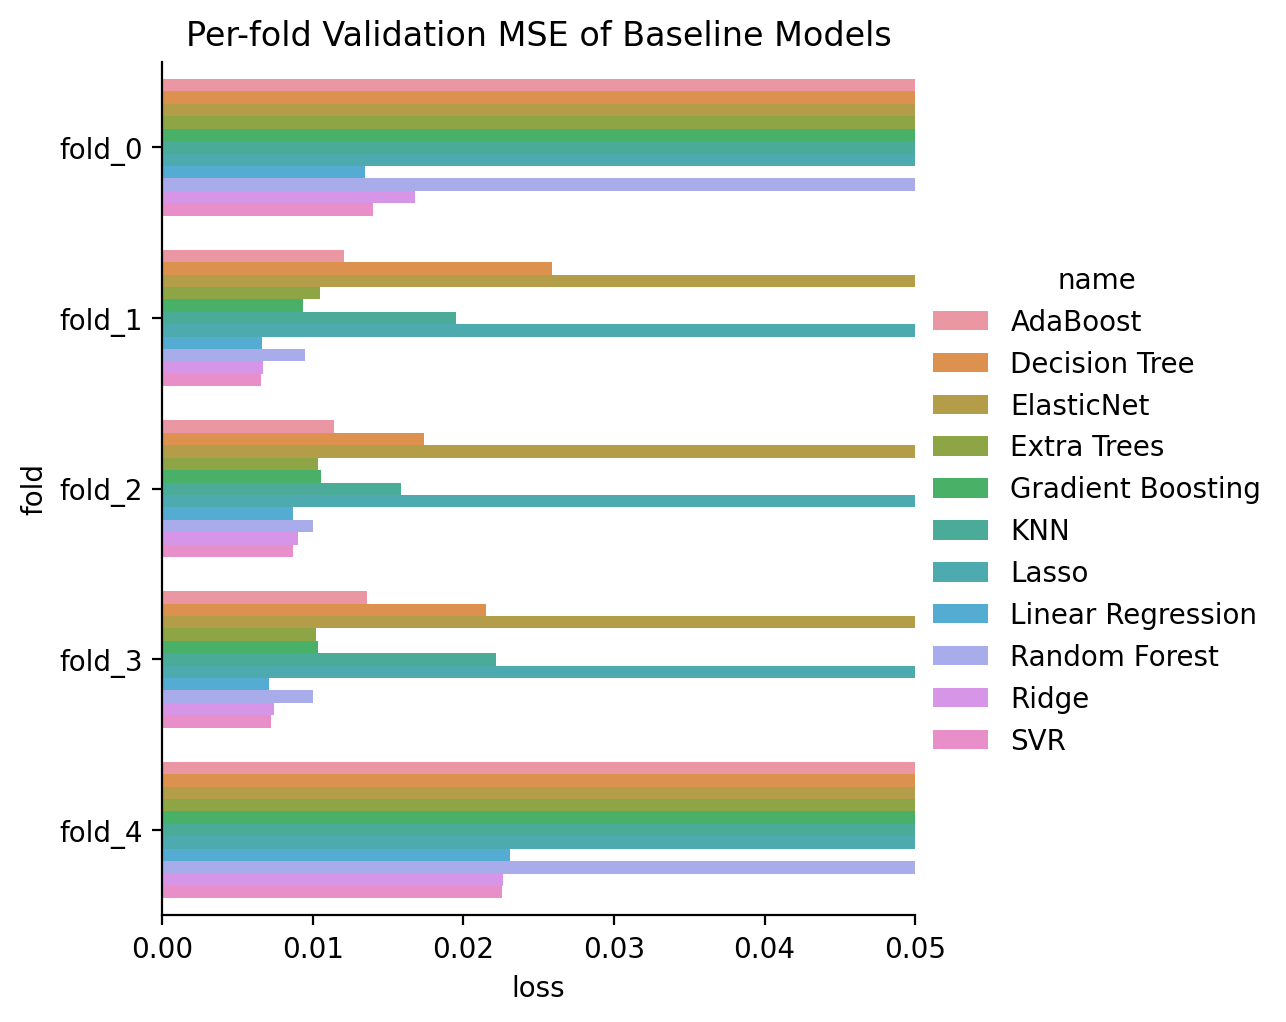

In [10]:
sns.catplot(
  data=val_mse_df,
  kind="bar",
  x="loss",
  y="fold",
  hue="name",
  orient="h"
)

plt.title("Per-fold Validation MSE of Baseline Models")
plt.xlim(0, 0.05)

plt.show()

In [11]:
for name, model in models.items():
    model.fit(X_train_scaled, y_train_scaled.flatten())

    y_pred_test = model.predict(X_test_scaled)
    test_mse = mean_squared_error(y_pred_test, y_test_scaled)

    y_test_scaled_inv = y_scaler.inverse_transform(y_test_scaled)
    y_pred_test_inv = y_scaler.inverse_transform(y_pred_test.reshape(-1, 1))

    actual_scores = reg_scores(y_pred_test_inv, y_test_scaled_inv)

    baseline_test_scores.append((name, test_mse))
    baseline_test_scores_actual[name] = actual_scores

D:\Workspaces\7001\.venv\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [12]:
test_mse_df = pd.DataFrame(baseline_test_scores, columns=["name", "loss"])
test_mse_df.set_index("name", inplace=True)
test_mse_df

,loss
name,
Linear Regression,0.009628
Lasso,3.085240
Ridge,0.009872
ElasticNet,1.038507
KNN,0.028821
SVR,0.009625
Decision Tree,0.040567
Random Forest,0.018656
Extra Trees,0.018135


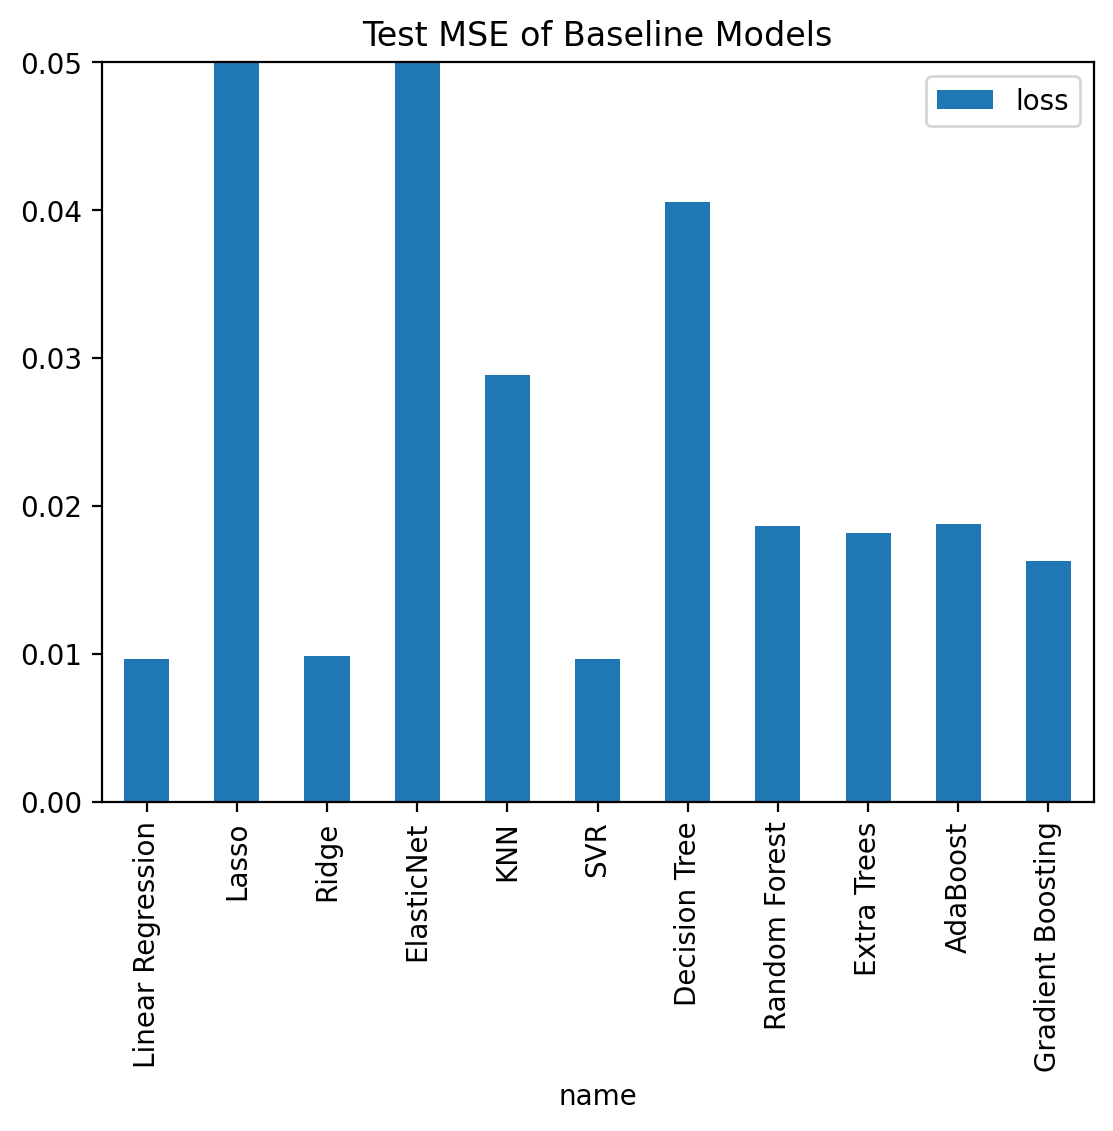

In [13]:
test_mse_df.plot.bar()

plt.title("Test MSE of Baseline Models")
plt.ylim(0, 0.05)

plt.show()

In [14]:
pd.DataFrame(baseline_test_scores_actual).T.sort_values(by="R2", ascending=False)

,MAE,MAPE,MSE,RMSE,R2
SVR,8.535688,0.005644,123.432194,11.110004,0.964497
Linear Regression,8.543723,0.005651,123.469162,11.111668,0.964467
Ridge,8.601046,0.005686,126.601886,11.251750,0.963477
Gradient Boosting,11.172072,0.007472,208.883936,14.452818,0.946371
Random Forest,11.786089,0.007887,239.260876,15.468060,0.938612
Extra Trees,11.936685,0.007952,232.572691,15.250334,0.935679
AdaBoost,11.973092,0.008007,241.205588,15.530795,0.935056
KNN,13.892385,0.009186,369.615449,19.225386,0.892185
Decision Tree,16.662465,0.011204,520.255147,22.809102,0.871944
Lasso,189.854645,0.111512,39566.850004,198.914177,0.000000
